# Classification

## Logistic Regression 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

### Important! 

__For all the questions below, fix the seed of random generators to 72.__

In [ ]:
np.random.seed = 72

### Load data

Tele-costumer-churn data-set. (you can download it from [here](https://www.kaggle.com/blastchar/telco-customer-churn))

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

> 1. Customers who left within the last month – the column is called Churn
> 2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
> 3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
> 4. Demographic info about customers – gender, age range, and if they have partners and dependents

In [ ]:
# find the link to the raw data from github
df = pd.read_csv("")
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes

For some of the data points there is no `TotalCharges` value. We need to find these data points and remove them.

In [ ]:
z = df["TotalCharges"].map(lambda x: x.replace('.', '', 1).isdigit())
df = df[z]

In [ ]:
df.reset_index(inplace=True)
df.shape

In [ ]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

### base rate
What is the base rate?

In [ ]:
# base rate

### Training

Train a logistic regression on this data-set. Use these set of features: "tenure", "MonthlyCharges", "TotalCharges", "gender", "PhoneService", "TechSupport", "StreamingTV", "PaperlessBilling"

- what is the train accuracy?

- what is the test accuracy?

- How does adding the categorical features improve the accuracy?

- what is the precision and recall for the customers who churn? (churn = yes)


__Hint__: Let's use label encoding and/or one-hot encoding for categorical features.

In [4]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [ ]:
# add the one-hot/label encoding

In [ ]:
# split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [ ]:
# we standardize only the numerical features
standardize = StandardScaler()
standardize.fit()

In [ ]:
# standardize.transform(...)

In [ ]:
# Logistic regression with cross-validation
'''
parameters:
solver='lbfgs', cv=5, max_iter=1000
'''


In [ ]:
# train accuracy


In [ ]:
# test accuracy


### Confusion matrix

In [ ]:
# confusion matrix


### precision-recall

- what are the precision and recall for calss label 1 ?


In [ ]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
# precision

# recall


### bonus! precision-recall curve

Read about `precision_recall_curve` from sklearn and plot the precision-recall curve for the classification you just did. (look at [this](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html) example)

### Hand-written digits data set

Let's play with a famous data-set in Machine Learning. We want to predict the digits from their hand-written images. These data-set contains $8 \times 8$ images of hand-written digits.

In [5]:
# The digits dataset: we can load it directly from sklearn 
digits = datasets.load_digits()


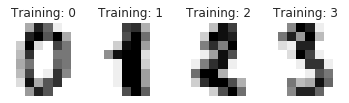

In [6]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)


In [ ]:
digits.images.shape

Looking at the images data, we can see that it is a 3-dimensional matrix. Therefore to apply a classifier on this data, we need to flatten the image, to turn the data into a (samples, feature) matrix. You can do it by using `np.reshape` from numpy package.

In [ ]:
# reshaping

In [ ]:
# train/test split
data_train, data_test, target_train, target_test = train_test_split(data, digits.target, test_size=0.2, random_state=72)

### Multi-class logistic regression

- Train a multi class logistic regression on this data-set

- what is the train accuracy?

- what is the test accuracy?

- what is the precision and recall for each class label?

- show the confusion matrix

In [ ]:
# Logistic regression with cross-validation
'''
parameters:
solver='saga', cv=3, max_iter=2000, tol=0.001, multi_class="multinomial"
'''


In [ ]:
# train accuracy


In [ ]:
# test accuracy


_Classification report_ gives you the precision and recall for each target class. (more about classification report [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html))

In [ ]:
from sklearn.metrics import classification_report


And finally the confusion matrix. Take a look at [this](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) example and try to visualize the confusion matrix.

In [ ]:
# confusion matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix


#### bonus! check if the predictions are correct for some examples of the images in the test set

Use `plt.imshow` to visualize an image with matplotlib.